## Contratos de Opción

### Ejercimiento Americana

#### Para la comparación de los modelos, se realizara la valuación de AL DC19 S=20.25 K=22 al 22 de Febrero del 2019

#### Modelos base de valuación propuestos:

##### &emsp; &emsp; &ensp;  Binomial Lattice (Cox-Ross & Rubinstein)(Actual)
##### &emsp; &emsp; &ensp;  Algoritmo:

&emsp; &emsp; &ensp; I. Creación del arbol binomial del precio del Subyacente

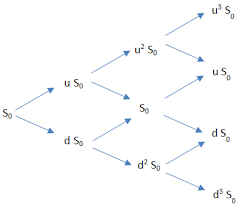

&emsp; &emsp; &ensp; &emsp; &ensp; Donde:

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $u = e^{\sigma\sqrt{\triangle t}}$

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $d = e^{-\sigma\sqrt{\triangle t}}$

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $S_{0}$ = Precio Spot del subyacente

&emsp; &emsp; &ensp;  II. Sea $N$ = Número de ramificaciones del arbol, calcular en $n=N$: 

&emsp; &emsp; &ensp; &emsp; &ensp; $C_{T \:,\:N} = Max(S_{T} - K,0)$ para una opción de compra

&emsp; &emsp; &ensp; &emsp; &ensp; $C_{T \:,\:N} = Max(K - S_{T},0)$ para una opción de venta

&emsp; &emsp; &ensp;  III. Encontrar el valor de la opción en los nodos previos al vencimiento:

&emsp; &emsp; &ensp; &emsp; &ensp; $ C_{t,\:i} = Max(\:\exp^{-r \triangle t}\:(p\:f_{u} + (1-p)f_{d})\:,\:S_{t} - K\:) $ para una opción de compra.

&emsp; &emsp; &ensp; &emsp; &ensp; $ C_{t,\:i} = Max(\:\exp^{-r \triangle t}\:(p\:f_{u} + (1-p)f_{d})\:,\:K - S_{t}\:) $ para una opción de venta.

&emsp; &emsp; &ensp; &emsp; &ensp; Donde: 

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $ p = \frac{e^{r\triangle t} - d}{u-d} $

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $ f_{u} $ = Valor de la Opción en un escenario de alza

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $ f_{d} $ = Valor de la Opción en un escenario de baja

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $ C_{t,i} $ = Valor de la Opcion al tiempo t en el nodo i del arbol derivado

&emsp; &emsp; &ensp;  IV. El valor de la opción determinado por el algoritmo es $C_{\:0\:,\:0\:}$ 

In [1]:
# Importarmos Curva de descuento
import pandas as pd
IRSTIIE = pd.read_excel("Y:/RIESGOS/Capacitación/Discovery SAS/Insumos Discovery Opciones/Curvas.xlsx","TIIE IRS").iloc[:,3]

In [3]:
import math as mt
import pandas as pd
import numpy as np

def Binomial_Tree(Spot,Strike,Vencimiento,Volatilidad,TLibre_Riesgo,Call_Put,Tasa_Foranea=0,Tasa_Dividendo=0,Ramificaciones_Arbol=100,Modelo="Cox Equity"):
    if Modelo == "Cox Equity":
        ConfigModelo = TLibre_Riesgo - Tasa_Dividendo
    if Modelo == "Cox Futuros":
        ConfigModelo = 0
    if Modelo == "Cox Divisas":
        ConfigModelo = TLibre_Riesgo - Tasa_Foranea
    
    Arbol_Subyacente = np.zeros((Ramificaciones_Arbol+1,Ramificaciones_Arbol+1))
    Arbol_Derivado = np.zeros((Ramificaciones_Arbol+1,Ramificaciones_Arbol+1))
    
    Vencimiento = Vencimiento/365.0
    Steps = Vencimiento/Ramificaciones_Arbol
    Up = mt.exp(Volatilidad*mt.sqrt(Steps))
    Down = mt.exp(-Volatilidad*mt.sqrt(Steps))
    P = (mt.exp(ConfigModelo*Steps) - Down)/(Up - Down)
    
    # Obtener las ultimas ramas del arbol binomial del precio del subyacente
    Arbol_Subyacente[0,0] = Spot
    
    for i in range(1,Ramificaciones_Arbol+1):
        Arbol_Subyacente[i,0] = Arbol_Subyacente[i-1,0]*Up
        for j in range(1,i+1):
            Arbol_Subyacente[i,j] = Arbol_Subyacente[i-1,j-1]*Down
    
    for j in range(Ramificaciones_Arbol+1):
        Arbol_Derivado[Ramificaciones_Arbol,j] = max(0,Call_Put*(Arbol_Subyacente[Ramificaciones_Arbol,j]-Strike))
    
    for m in range(Ramificaciones_Arbol+1):
        i = Ramificaciones_Arbol-m-1
        for j in range(i+1):
            Arbol_Derivado[i,j] = max(Call_Put*(Arbol_Subyacente[i,j]-Strike),(P*Arbol_Derivado[i+1,j]+(1-P)*Arbol_Derivado[i+1,j+1])*mt.exp(-TLibre_Riesgo*Steps))
    
    #return pd.concat([pd.DataFrame(Arbol_Subyacente).replace(0,""),pd.DataFrame(Arbol_Derivado).replace(0,"")]) 
    return Arbol_Derivado[0,0]

In [4]:
Binomial_Tree(Spot=20.25,Strike=22,Vencimiento=287,Volatilidad=.32,TLibre_Riesgo=IRSTIIE[287-1]/100,
                       Call_Put=1,Tasa_Foranea=0,Tasa_Dividendo=0,Ramificaciones_Arbol=1000,Modelo="Cox Equity")

2.1588540227046344

##### &emsp; &emsp; &ensp;  Trinomial Lattice model (Boyle)
##### &emsp; &emsp; &ensp;  Algoritmo:

&emsp; &emsp; &ensp; I. Creacion del arbol trinomial del precio del Subyacente

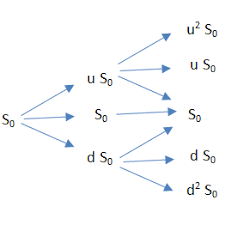

&emsp; &emsp; &ensp; &emsp; &ensp; Donde:

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $u = e^{\sigma\sqrt{2\triangle t}}$

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $d = e^{-\sigma\sqrt{2\triangle t}}$

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $m = 1 $

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $S_{0}$ = Precio Spot del subyacente

&emsp; &emsp; &ensp;  II. Sea $N$ = Número de ramificaciones del arbol, calcular en $n=N$: 

&emsp; &emsp; &ensp; &emsp; &ensp; $C_{T \:,\:N} = Max(S_{T} - K,0)$ para una opción de compra

&emsp; &emsp; &ensp; &emsp; &ensp; $C_{T \:,\:N} = Max(K - S_{T},0)$ para una opción de venta

&emsp; &emsp; &ensp;  III. Encontrar el valor de la opción en los nodos previos al vencimiento:

&emsp; &emsp; &ensp; &emsp; &ensp; $ C_{t,\:i} = Max(\:\exp^{-r \triangle t}\:(p_{u}f_{u} + p_{m}f_{m} + p_{d}f{d})\:,\:S_{t} - K\:) $ para una opción de compra.

&emsp; &emsp; &ensp; &emsp; &ensp; $ C_{t,\:i} = Max(\:\exp^{-r \triangle t}\:(p_{u}f_{u} + p_{m}f_{m} + p_{d}f{d})\:,\:K - S_{t}\:) $ para una opción de venta.

&emsp; &emsp; &ensp; &emsp; &ensp; Donde: 

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $ p_{u} = \left(\frac{e^{r\frac{\triangle t}{2}} - e^{-\sigma \sqrt \frac{\triangle t}{2}}}{e^{\sigma\sqrt\frac{\triangle t}{2}} - e^{-\sigma\sqrt\frac{\triangle t}{2}}}\right)^{2} $

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $ p_{d} = \left(\frac{e^{\sigma\sqrt\frac{\triangle t}{2}} - e^{r\frac{\triangle t}{2}}}{e^{\sigma\sqrt\frac{\triangle t}{2}} - e^{-\sigma\sqrt\frac{\triangle t}{2}}}\right)^{2} $

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $ p_{m} = 1 \: - \: p_{u} - p_{d} $

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $ f_{u} $ = Valor de la Opción en un escenario de alza

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $ f_{d} $ = Valor de la Opción en un escenario de baja

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $ f_{m} $ = Valor de la Opción en un escenario de sin movimiento

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $ C_{t,i} $ = Valor de la Opcion al tiempo t en el nodo i del arbol derivado

&emsp; &emsp; &ensp;  IV. El valor de la opción determinado por el algoritmo es $C_{\:0\:,\:0\:}$ 



In [7]:
import math as Mt
def Trinomial_Tree(Spot,Strike,Vencimiento,Volatilidad,TLibre_Riesgo,Call_Put,Tasa_Foranea=0,Tasa_Dividendo=0,Ramificaciones_Arbol=100,Modelo="Cox Equity"):
    if Modelo == "Cox Equity":
        ConfigModelo = TLibre_Riesgo - Tasa_Dividendo
    if Modelo == "Cox Futuros":
        ConfigModelo = 0
    if Modelo == "Cox Divisas":
        ConfigModelo = TLibre_Riesgo - Tasa_Foranea
    
    Arbol_Subyacente = np.zeros((Ramificaciones_Arbol+1,(2*Ramificaciones_Arbol)+1))
    Arbol_Derivado = np.zeros((Ramificaciones_Arbol+1,(2*Ramificaciones_Arbol)+1))
    
    Vencimiento = Vencimiento/365.0
    Steps = Vencimiento/Ramificaciones_Arbol
    Up = Mt.exp(Volatilidad*Mt.sqrt(2*Steps))
    Down = Mt.exp(-Volatilidad*Mt.sqrt(2*Steps))
    Pu = ((Mt.exp(TLibre_Riesgo*Steps/2)-Mt.exp(-Volatilidad*Mt.sqrt(Steps/2)))/(Mt.exp(Volatilidad*Mt.sqrt(Steps/2))-Mt.exp(-Volatilidad*Mt.sqrt(Steps/2))))**2
    Pd = ((Mt.exp(Volatilidad*Mt.sqrt(Steps/2))-Mt.exp(TLibre_Riesgo*Steps/2))/(Mt.exp(Volatilidad*Mt.sqrt(Steps/2))-Mt.exp(-Volatilidad*Mt.sqrt(Steps/2))))**2
    Pm = 1-(Pu+Pd)
    
    # Obtener las ultimas ramas del arbol binomial del precio del subyacente
    Arbol_Subyacente[0,0] = Spot
    
    for i in range(1,Ramificaciones_Arbol+1):
        Arbol_Subyacente[i,0] = Arbol_Subyacente[i-1,0]*Up
        for j in range(1,(2*i)):
            Arbol_Subyacente[i,j] = Arbol_Subyacente[i-1,j-1]
            Arbol_Subyacente[i,j+1] = Arbol_Subyacente[i-1,j-1]*Down
        
    for j in range((2*Ramificaciones_Arbol)+1):
        Arbol_Derivado[Ramificaciones_Arbol,j] = max(Call_Put*(Arbol_Subyacente[Ramificaciones_Arbol,j]-Strike),0)
    
    for m in range(Ramificaciones_Arbol+1):
        i = Ramificaciones_Arbol-m-1
        for j in range((2*i) + 1):
            Arbol_Derivado[i,j] = max(Call_Put*(Arbol_Subyacente[i,j]-Strike),(Pu*Arbol_Derivado[i+1,j]+Pm*Arbol_Derivado[i+1,j+1]+Pd*Arbol_Derivado[i+1,j+2])*Mt.exp(-TLibre_Riesgo*Steps))

    #return pd.concat([pd.DataFrame(Arbol_Subyacente).replace(0,""),pd.DataFrame(Arbol_Derivado).replace(0,"")])
    return Arbol_Derivado[0,0]

In [8]:
Trinomial_Tree(Spot=20.25,Strike=22,Vencimiento=287,Volatilidad=.32,TLibre_Riesgo=IRSTIIE[287-1]/100,
                       Call_Put=1,Tasa_Foranea=0,Tasa_Dividendo=0,Ramificaciones_Arbol=750,Modelo="Cox Equity")

2.1586800025168826

##### &emsp; &emsp; &ensp;  Least-Squares Monte Carlo Simulation
##### &emsp; &emsp; &ensp;  Algoritmo:

&emsp; &emsp; &ensp; I. Simular los $m$ caminos del Subyacente

&emsp; &emsp; &ensp; &emsp; &emsp; $S_{i}^{m} = $ Valor del subyacente simulado en el nodo $i$ del camino $m$

&emsp; &emsp; &ensp; &emsp; &emsp; $S_{i+1}^{m} = S_{i}^{m}\:e^{\:(r-\frac{\sigma^{2}}{2})\:\triangle t\:+\: \phi\sqrt{\triangle t\:\sigma^{2}}}$

&emsp; &emsp; &ensp; &emsp; &emsp; $\phi = $ Variable aleatoria con Distribucion Normal Estandar

&emsp; &emsp; &ensp; II. Simular el valor de Ejercimiento en T utilizando los caminos simulados del Subyacente

&emsp; &emsp; &ensp; &emsp; &emsp; $S_{T}^{m} - K$ para Opciones de compra

&emsp; &emsp; &ensp; &emsp; &emsp; $K - S_{T}^{m}$ para Opciones de venta

&emsp; &emsp; &ensp; III. Determinar el valor de Ejercimiento ($EV$), Continuidad ($HV$), Esperado de Continuidad ($\hat{E[HV]}$) y Opción ($OV$) para $t\:<\:T$: 

&emsp; &emsp; &ensp; &emsp; &emsp; $EV_{t} = S_{t}^{m} - K$ para Opciones de compra

&emsp; &emsp; &ensp; &emsp; &emsp; $EV_{t} = K - S_{t}^{m}$ para Opciones de venta

&emsp; &emsp; &ensp; &emsp; &emsp; $HV_{t} = OV_{t+1} \:e^{-r\triangle t}$

&emsp; &emsp; &ensp; &emsp; &emsp; $\hat{E[HV]_{t}} = \hat{\alpha} \: + \: \hat{\beta_{0}} S_{t} + \: \hat{\beta_{1}} S_{t}^{2} $

&emsp; &emsp; &ensp; &emsp; &emsp; $OV_{t} = Max(\hat{E[HV]_{t}},EV_{t}) $

&emsp; &emsp; &ensp; &emsp; &ensp; Donde: 

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $\hat{\alpha} \: , \: \hat{\beta_{0}} \: , \: \hat{\beta_{1}} $ se obtienen de la ecuación regresiva  $HV_{t} = \alpha \: + \: \beta_{0} S_{t} + \: \beta_{1}S_{t}^{2} + \: \beta_{2}S_{t}^{3} + \omega$

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $\omega =$ Componente de Ruido blanco

&emsp; &emsp; &ensp; &emsp; &emsp; &ensp; $\alpha$ se tómata como 0 en nuestra ecuación regresiva

&emsp; &emsp; &ensp;IV. Realizar el punto III de manera iterativa hasta $t = 0$

&emsp; &emsp; &ensp;V. El valor de la opción sera el promedio de los caminos del derivado en $t = 0$

In [9]:
import numpy as np
import math as mt
from sklearn.linear_model import LinearRegression

def LSM(Spot,Strike,Vencimiento,Volatilidad,TLibre_Riesgo,Call_Put,NumSim=10,CambiosXDia=1):

    Deltat = 1/(Vencimiento*CambiosXDia) # Asumo N Cambios en el precio del subyacente por cada día
    Caminos_Subyacente = np.zeros((NumSim,(Vencimiento*CambiosXDia)+1))
    v = Volatilidad/mt.sqrt(365/Vencimiento) # Se ajusta v pues v es anualizada
    r = TLibre_Riesgo/(365/Vencimiento) # Se ajusta r pues r es anualizada

    for m in range(0,NumSim):
        Caminos_Subyacente[m,0] = Spot
        for t in range(1,(Vencimiento*CambiosXDia)+1):
            Caminos_Subyacente[m,t] = Caminos_Subyacente[m,t-1]*mt.exp((r - (v**2)/2)*Deltat + np.random.normal(0,1)*mt.sqrt((v**2)*Deltat))

    Caminos_Derivado = np.zeros((NumSim,(Vencimiento*CambiosXDia)+1)) 
    Caminos_Derivado[:,(Vencimiento*CambiosXDia)] = np.maximum((Caminos_Subyacente[:,(Vencimiento*CambiosXDia)] - Strike)*Call_Put,0) 

    for t in range((Vencimiento*CambiosXDia)-1,-1,-1):
        Caminos_Derivado[:,t] = Caminos_Derivado[:,t+1]*mt.exp(-r*Deltat) # Valor de Continuidad Observado (HV)
        Caminos_EnEl_Dinero = ((Caminos_Subyacente[:,t]-Strike)*Call_Put>0)
        if Caminos_EnEl_Dinero.sum()>0:    
            Tabla_Regresion = np.zeros((Caminos_EnEl_Dinero.sum(),4))
            Tabla_Regresion[:,0] = Caminos_Subyacente[:,t][Caminos_EnEl_Dinero] #np.vectorize(mt.exp)(-Caminos_Subyacente[:,t][Caminos_EnEl_Dinero]/2)
            Tabla_Regresion[:,1] = Caminos_Subyacente[:,t][Caminos_EnEl_Dinero]**2 #np.vectorize(mt.exp)(-Caminos_Subyacente[:,t][Caminos_EnEl_Dinero]/2)*(1-Caminos_Subyacente[:,t][Caminos_EnEl_Dinero])
            Tabla_Regresion[:,2] = Caminos_Subyacente[:,t][Caminos_EnEl_Dinero]**3 #np.vectorize(mt.exp)(-Caminos_Subyacente[:,t][Caminos_EnEl_Dinero]/2)*(1-2*Caminos_Subyacente[:,t][Caminos_EnEl_Dinero]+(Caminos_Subyacente[:,t][Caminos_EnEl_Dinero]**2)/2)
            Modelo = LinearRegression().fit(Tabla_Regresion[:,0:3],Caminos_Derivado[:,t][Caminos_EnEl_Dinero])
            #print(Modelo.score(Tabla_Regresion[:,0:3],Caminos_Derivado[:,t][Caminos_EnEl_Dinero]))
            Tabla_Regresion[:,3] = Modelo.intercept_ + Modelo.coef_[0]*Tabla_Regresion[:,0] + Modelo.coef_[1]*Tabla_Regresion[:,1] + Modelo.coef_[2]*Tabla_Regresion[:,2] # Valor de Continuidad Esperado
            # Your next line is: Si E[HV]<EV entonces EV, HV En otro caso (OV)
            Caminos_Derivado[np.where(Caminos_EnEl_Dinero==True),t] = np.where(Tabla_Regresion[:,3]<(Caminos_Subyacente[:,t][Caminos_EnEl_Dinero]-Strike)*Call_Put,(Caminos_Subyacente[:,t][Caminos_EnEl_Dinero]-Strike)*Call_Put,Caminos_Derivado[:,t][Caminos_EnEl_Dinero])
            #Caminos_Derivado[np.where((Caminos_EnEl_Dinero==True)&(Tabla_Regresion[:,3]<(Caminos_Subyacente[:,t][Caminos_EnEl_Dinero]-Strike)*Call_Put)),t+1] = 0   

    #return pd.DataFrame(Caminos_Subyacente)
    return Caminos_Derivado[:,0].mean()

In [17]:
LSM(Spot=20.25,Strike=22,Vencimiento=287,Volatilidad=.32,TLibre_Riesgo=IRSTIIE[287-1]/100,Call_Put=1,NumSim=7500,CambiosXDia=1)

2.1969100371412447